In [32]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import auc, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
pd.set_option('max_colwidth', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the datasets
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")


In [3]:
train_df.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,...,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,...,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,...,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,...,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104867 entries, 0 to 104866
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           104867 non-null  object 
 1   country      104867 non-null  object 
 2   region       104188 non-null  object 
 3   population   104867 non-null  float64
 4   age          104580 non-null  float64
 5   Q1           104867 non-null  int64  
 6   Q2           47721 non-null   float64
 7   Q3           45214 non-null   float64
 8   Q4           57445 non-null   float64
 9   Q5           57445 non-null   float64
 10  Q6           104867 non-null  int64  
 11  Q7           20641 non-null   float64
 12  Q8           59029 non-null   float64
 13  Q9           59029 non-null   float64
 14  Q10a         104867 non-null  int64  
 15  Q10b         104867 non-null  int64  
 16  Q11          104867 non-null  int64  
 17  Q12          104867 non-null  int64  
 18  Q13a         104867 non-

In [5]:
test_df.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,...,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,...,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,...,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,...,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,...,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [6]:
train_df.isnull().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2             57146
Q3             59653
Q4             47422
Q5             47422
Q6                 0
Q7             84226
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q23            67287
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

In [7]:
train_df.size

3775212

In [8]:
variableDefinitions = pd.read_csv("VariableDefinitions.csv")
variableDefinitions

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [9]:
print(train_df.shape)
print(test_df.shape)

(104867, 36)
(44943, 35)


In [10]:
#Checking for missing values in our train_df datasets
test_df.isnull().sum()

ID                 0
country            0
region           301
population         0
age              124
Q1                 0
Q2             24527
Q3             25595
Q4             20384
Q5             20384
Q6                 0
Q7             36069
Q8             19700
Q9             19700
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            10431
Q20            10431
Q21                0
Q22                0
Q23            28943
Q24                0
Q25                0
Q26            10431
Q27            19837
owns_mobile        1
Q28            13433
dtype: int64

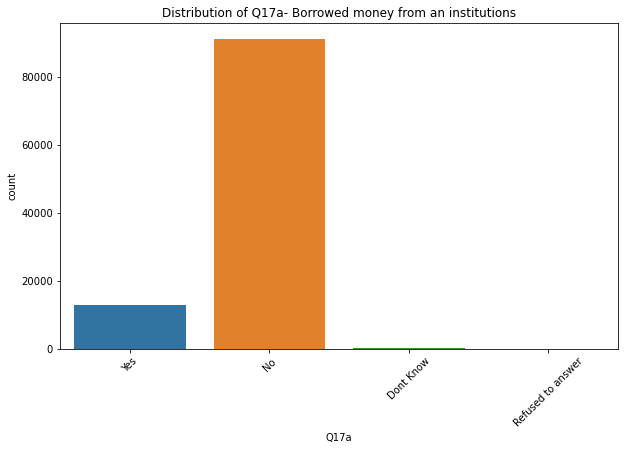

In [11]:
# Q17a - borrowed money from an institutions
plt.figure(figsize=(10,6))
ax = sns.countplot(train_df.Q17a)
ax.set_xticklabels(['Yes', 'No','Dont Know','Refused to answer'], rotation=45)
plt.title("Distribution of Q17a- Borrowed money from an institutions");

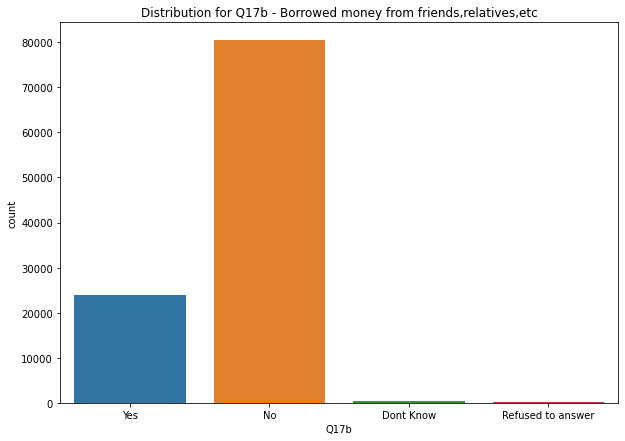

In [12]:
#Distribution for Q17b - Borrowed money from friends,relatives,etc
plt.figure(figsize=(10,7))
ax = sns.countplot(train_df.Q17b)
ax.set_xticklabels(['Yes','No','Dont Know','Refused to answer'])
plt.title("Distribution for Q17b - Borrowed money from friends,relatives,etc");

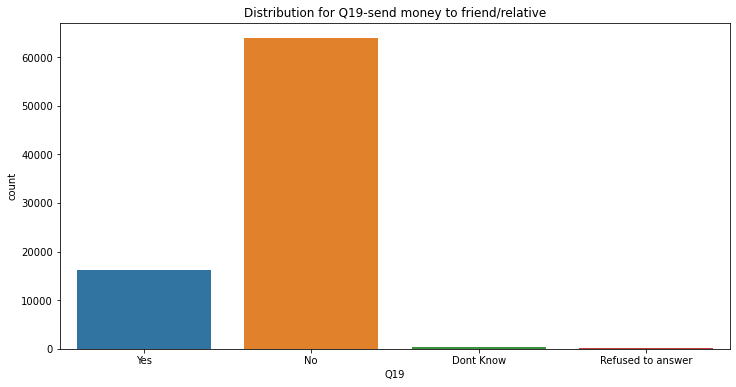

In [13]:
#Distribution for Q19-send money to friend/relative
plt.figure(figsize = (12,6))
ax = sns.countplot(train_df.Q19)
ax.set_xticklabels(['Yes','No','Dont Know','Refused to answer'])
plt.title("Distribution for Q19-send money to friend/relative")
plt.show()

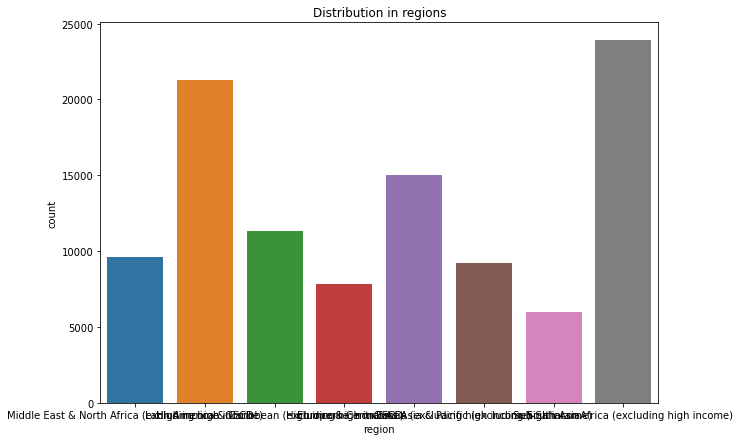

In [14]:
#Distribution in regions
plt.figure(figsize=(10,7))
ax = sns.countplot(train_df.region)
# ax.set_xticklabels([""], rotation = 45)
plt.title("Distribution in regions")
plt.show()

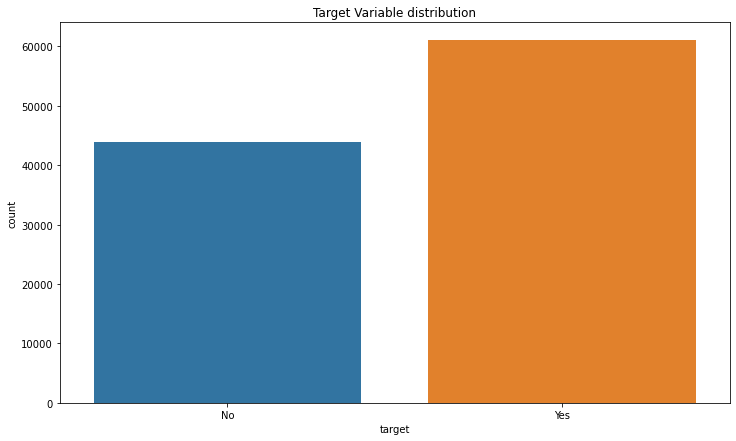

In [15]:
#Distributon of the target variable
plt.figure(figsize=(12,7))
ax = sns.countplot(train_df.target)
ax.set_xticklabels(['No',"Yes"])
plt.title("Target Variable distribution")
plt.show()

This shows us that our target variable which is "Can one  make payment if you were in an emergency) is fairly balanced.
Where we see that the majority can make a payment incase of an emergency

In [16]:
#We combine the datasets(train_df &test_df)
ntrain = train_df.shape[0] #Used to split train and test set from combined dataframe
all_data = pd.concat((train_df,test_df)).reset_index(drop=True)
print(f'The shape of the combined dataframeis: {all_data.shape}')

The shape of the combined dataframeis: (149810, 36)


In [17]:
#Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           149810 non-null  object 
 1   country      149810 non-null  object 
 2   region       148830 non-null  object 
 3   population   149810 non-null  float64
 4   age          149399 non-null  float64
 5   Q1           149810 non-null  int64  
 6   Q2           68137 non-null   float64
 7   Q3           64562 non-null   float64
 8   Q4           82004 non-null   float64
 9   Q5           82004 non-null   float64
 10  Q6           149810 non-null  int64  
 11  Q7           29515 non-null   float64
 12  Q8           84272 non-null   float64
 13  Q9           84272 non-null   float64
 14  Q10a         149810 non-null  int64  
 15  Q10b         149810 non-null  int64  
 16  Q11          149810 non-null  int64  
 17  Q12          149810 non-null  int64  
 18  Q13a         149810 non-

In [18]:
#Checking he missing values
all_data.isnull().sum()

ID                  0
country             0
region            980
population          0
age               411
Q1                  0
Q2              81673
Q3              85248
Q4              67806
Q5              67806
Q6                  0
Q7             120295
Q8              65538
Q9              65538
Q10a                0
Q10b                0
Q11                 0
Q12                 0
Q13a                0
Q14                 0
Q15                 0
Q16                 0
Q17a                0
Q17b                0
Q19             34604
Q20             34604
Q21                 0
Q22                 0
Q23             96230
Q24                 0
Q25                 0
Q26             34604
Q27             66275
owns_mobile         2
Q28             44438
target          44943
dtype: int64

In [19]:
#Category columns
cat_cols = ['country','region','owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age','population']


# change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

#Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q2           68137 non-null   category
 7   Q3           64562 non-null   category
 8   Q4           82004 non-null   category
 9   Q5           82004 non-null   category
 10  Q6           149810 non-null  category
 11  Q7           29515 non-null   category
 12  Q8           84272 non-null   category
 13  Q9           84272 non-null   category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a

In [20]:
#NUmber of unique values per categorical column
for col in cat_cols:
    print(col, all_data[col].nunique())

country 144
region 8
owns_mobile 4
Q1 4
Q2 4
Q3 4
Q4 4
Q5 4
Q6 4
Q7 4
Q8 4
Q9 4
Q10a 4
Q10b 4
Q11 4
Q12 4
Q13a 4
Q14 4
Q15 4
Q16 4
Q17a 4
Q17b 4
Q19 4
Q20 4
Q21 4
Q22 4
Q23 4
Q24 4
Q25 4
Q26 4
Q27 4
Q28 4


**Fill in missing values**

In [21]:
#For cat cols and date cols fill in with mode and num cols fil in with 9999
for col in all_data.columns:
    if col in cat_cols:
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    elif col in num_cols:
        all_data[col] = all_data[col].fillna(all_data[col].fillna(9999))
#Confirm that there arent any missing values
all_data[all_data.columns.difference(['target'])].isna().sum().any()

False

**Feature Engineering**

In [22]:
#using onehot encoding to turn categorical values into numeric values
all_data1 = pd.get_dummies(data = all_data, columns=cat_cols)
all_data1.head()

,ID,population,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,...,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,ID_0000020532,25550170.0,66.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,ID_0000075765,4591023.0,44.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,ID_0000085491,25550170.0,29.0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,ID_0000144505,30491168.0,44.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,ID_0000214184,93002320.0,36.0,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [24]:
#shape of our datasets after encoding
all_data1.shape

(149810, 276)

In [25]:
#Separate the train and test data from the combined dataframe
train_df1 = all_data1[:ntrain]
test_df2 = all_data1[ntrain:]


In [27]:
train_df1.shape, test_df2.shape

((104867, 276), (44943, 276))

**Training and making predictions**

In [29]:
#Select main columns to be used in training
int_cols = all_data1.columns.difference(['ID','target'])
X = train_df1[int_cols]
y = train_df1.target.astype(int)

In [38]:
#Split data into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)


In [90]:
#Train Model
logmodel = LogisticRegression().set_params()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict_proba(X_test)[:, 1]

In [91]:
predictions

array([0.50010079, 0.5000921 , 0.5006289 , ..., 0.50037805, 0.50030589,
       0.50034179])

In [92]:
#Check the auc score of the model
print(f'LogisticRegression AUC score on the X_test is :{roc_auc_score(y_test,predictions)}\n')

#print classification report 
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in predictions ]))

LogisticRegression AUC score on the X_test is :0.4809122052816443

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12994
           1       0.59      1.00      0.74     18467

    accuracy                           0.59     31461
   macro avg       0.29      0.50      0.37     31461
weighted avg       0.34      0.59      0.43     31461



***Train different model and compare result***

In [43]:
#train model
import xgboost as xgb

In [48]:
model1 = xgb.XGBClassifier()
# fiting the model
model1.fit(X_train,y_train)

[13:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
#make predictions
y_pred = model1.predict_proba(X_test)[:,1]

#Check the auc score of the model
print(f'XGBoost AUC score on the X_test is :{roc_auc_score(y_test,y_pred)}\n')


XGBoost AUC score on the X_test is :0.7954307426434113



We can clearly see the improvement after using XGBclassifier

In [50]:
#Print the classfication report
print(classification_report(y_test, [1 if x >= 0.5 else 0 for x in y_pred]))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67     12994
           1       0.76      0.77      0.77     18467

    accuracy                           0.73     31461
   macro avg       0.72      0.72      0.72     31461
weighted avg       0.72      0.73      0.73     31461



In [99]:
# making predictions of the test set
test_df1 = test_df2[int_cols]
predictions = model1.predict_proba(test_df1)[:, 1]
print(test_df1.shape)


(44943, 274)


In [79]:
D_train = xgb.DMatrix(X_train, label = y_train)
D_test = xgb.DMatrix(X_test, label = y_test )

# defining the params in the XGBoost model
params = {
    'eta' :0.2,
    'max_depth' :3,
    'objective' : 'multi:softprob',
    'num_class' : 2
    
}
steps = 10

In [80]:
#training and testing
model2 = xgb.train(params, D_train, steps)

[15:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
#making the prediction
preds = model2.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])


In [82]:

#Check the auc score of the model
print(f'XGBoost AUC score on the X_test is :{roc_auc_score(y_test,best_preds)}\n')


XGBoost AUC score on the X_test is :0.67084384969544



In [100]:
#Create a submission file

samplesubmission = pd.read_csv("SampleSubmission.csv")
sub_file = samplesubmission.copy()
sub_file.target = predictions

In [101]:
samplesubmission.shape

(44943, 2)

In [102]:
sub_file.to_csv('resilence.csv',index = False)
sub_file.head()

,ID,target
0,ID_0000005111,0.853463
1,ID_0000389416,0.287669
2,ID_0000634789,0.462269
3,ID_0000778100,0.964493
4,ID_0001123210,0.703131
